# **TikTok Project**
**Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [190]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

pd.options.display.float_format = '{:.6f}'.format

Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [191]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

What are some purposes of EDA before constructing a logistic regression model?

* The purposes are to verify model assumptions (no severe multicollinearity), and to identify data anomalies (outliers, class imbalance, distribution, etc).


### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [192]:
# Display first few rows
data.head(n= 10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.000000,19425.000000,241.000000,1.000000,0.000000
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.000000,77355.000000,19034.000000,1161.000000,684.000000
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.000000,97690.000000,2858.000000,833.000000,329.000000
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.000000,239954.000000,34812.000000,1234.000000,584.000000
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.000000,34987.000000,4110.000000,547.000000,152.000000
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.000000,175546.000000,62303.000000,4293.000000,1857.000000
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.000000,486192.000000,193911.000000,8616.000000,5446.000000
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.000000,1072.000000,50.000000,22.000000,11.000000
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.000000,10160.000000,1050.000000,53.000000,27.000000
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.000000,171051.000000,67739.000000,4104.000000,2540.000000


Get the number of rows and columns in the dataset.

In [193]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [194]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [195]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [196]:
# Generate basic descriptive stats
data.describe()
# data.describe(include= 'all')

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19382.000000,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5627454067.339129,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2536440464.169367,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1234959018.000000,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3430416807.250000,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5618663579.000000,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7843960211.250000,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9999873075.000000,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [197]:
# Check for missing values
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Since the missing values are less than 5% of the dataset, we can eliminate the nulls.

In [198]:
# Drop rows with missing values
data = data.dropna(axis= 0) #by rows 

In [199]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.000000,19425.000000,241.000000,1.000000,0.000000
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.000000,77355.000000,19034.000000,1161.000000,684.000000
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.000000,97690.000000,2858.000000,833.000000,329.000000
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.000000,239954.000000,34812.000000,1234.000000,584.000000
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.000000,34987.000000,4110.000000,547.000000,152.000000


Check for and handle duplicates.

In [200]:
# Check for duplicates
data.duplicated().sum()


np.int64(0)

Check for and handle outliers.

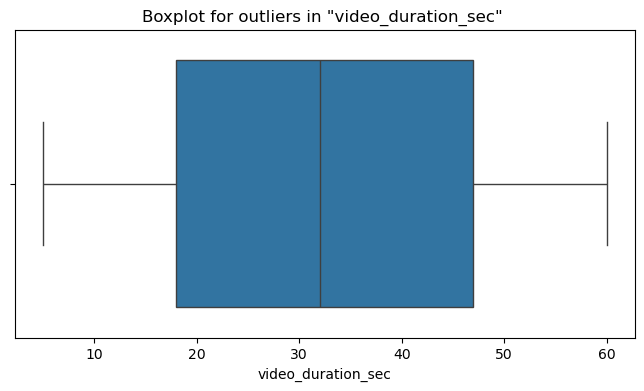

In [201]:
# Create a boxplot to visualize distribution of `video_duration_sec`

plt.figure(figsize= (8,4))
sns.boxplot(x= data.video_duration_sec)
plt.title('Boxplot for outliers in "video_duration_sec" ')
plt.show()


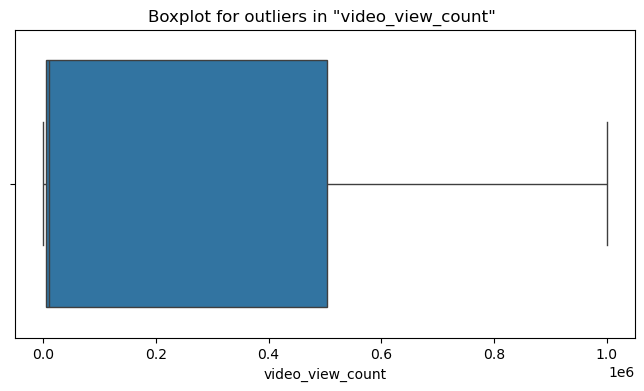

In [202]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize= (8,4))
sns.boxplot(x= data.video_view_count)
plt.title('Boxplot for outliers in "video_view_count" ')
plt.show()


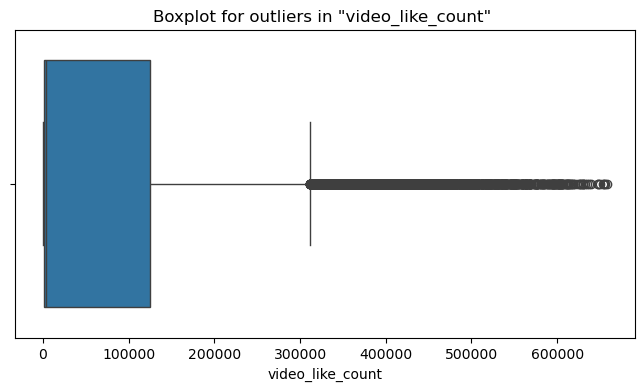

In [203]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize= (8,4))
sns.boxplot(x= data.video_like_count)
plt.title('Boxplot for outliers in "video_like_count" ')
plt.show()

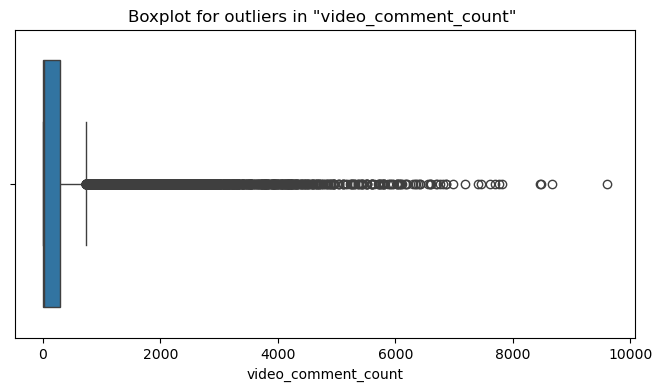

In [204]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize= (8,4))
sns.boxplot(x= data.video_comment_count)
plt.title('Boxplot for outliers in "video_comment_count" ')
plt.show()


In [205]:
# Check for and handle outliers for video_like_count

#defininf the quantiles
q1 = data['video_like_count'].quantile(0.25)
q3 = data['video_like_count'].quantile(0.25)

#defining the Upper limit 
iqr = q3-q1
upper_limit = q3 + (1.5*iqr)

#Transforming outliers into limit values
data.loc[data['video_like_count'] > upper_limit, 'video_like_count'] = upper_limit #This changes the values of
                                                                                   #outliers into the last accepted value   


In [206]:
# Check for and handle for video_comment_count

#defininf the quantiles
q1 = data['video_comment_count'].quantile(0.25)
q3 = data['video_comment_count'].quantile(0.25)

#defining the Upper limit 
iqr = q3-q1
upper_limit = q3 + (1.5*iqr)

#Transforming outliers into limit values
data.loc[data['video_comment_count'] > upper_limit, 'video_comment_count'] = upper_limit #This changes the values of
                                                                                         #outliers into the last accepted value   



Check class balance.

In [207]:
# Check class balance for video_comment_count
data['verified_status'].value_counts(normalize= True)

verified_status
not verified   0.937120
verified       0.062880
Name: proportion, dtype: float64

Approximately 93.71% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [208]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=42)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [209]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions             
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.563017


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [210]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe

                                                                           #applies the function to each row in DF       
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text)) #apply function len to text

In [211]:
# Display first few rows of dataframe after adding new column
data_upsampled.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.000000,810.750000,241.000000,1.000000,0.000000,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.000000,810.750000,19034.000000,1161.000000,1.000000,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.000000,810.750000,2858.000000,833.000000,1.000000,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.000000,810.750000,34812.000000,1234.000000,1.000000,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.000000,810.750000,4110.000000,547.000000,1.000000,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

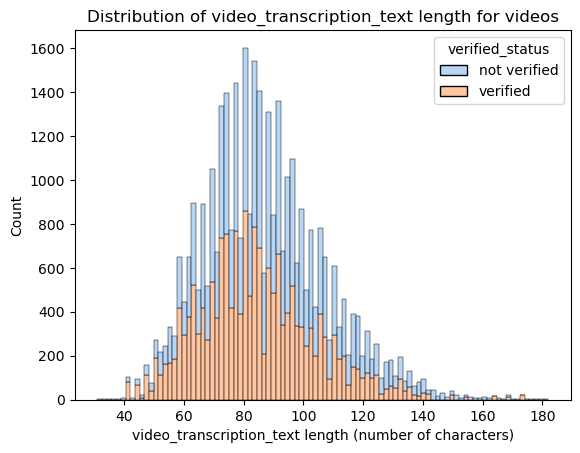

In [212]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data     =data_upsampled,
             x        ="text_length",  
             multiple ="stack",         #stacking bars
             palette  ="pastel", 
             hue      ="verified_status"
             )
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos")
plt.show()


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [213]:
# Code a correlation matrix to help determine most correlated variables
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.001369,-0.011800,-0.698969,-0.368509,-0.503634,-0.489758,-0.347271,-0.196817
video_id,-0.001369,1.000000,0.013938,0.001607,0.003747,0.009136,0.006814,0.002456,-0.007634
video_duration_sec,-0.011800,0.013938,1.000000,0.013892,-0.014597,0.001944,0.006930,-0.026395,-0.005043
video_view_count,-0.698969,0.001607,0.013892,1.000000,0.353566,0.710466,0.691557,0.335056,0.246867
video_like_count,-0.368509,0.003747,-0.014597,0.353566,1.000000,0.253107,0.248969,0.623286,0.121244
video_share_count,-0.503634,0.009136,0.001944,0.710466,0.253107,1.000000,0.709738,0.241260,0.176362
video_download_count,-0.489758,0.006814,0.006930,0.691557,0.248969,0.709738,1.000000,0.240254,0.175287
video_comment_count,-0.347271,0.002456,-0.026395,0.335056,0.623286,0.241260,0.240254,1.000000,0.130712
text_length,-0.196817,-0.007634,-0.005043,0.246867,0.121244,0.176362,0.175287,0.130712,1.000000


Visualize a correlation heatmap of the data.

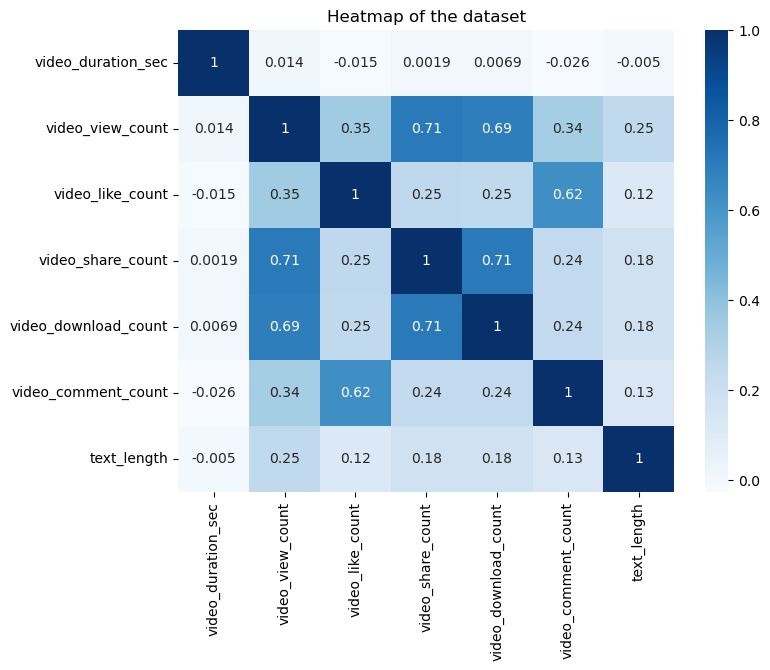

In [214]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(data_upsampled[["video_duration_sec", "video_view_count",
                            "video_like_count", "video_share_count",
                            "video_download_count", "video_comment_count", 
                            "text_length"]].corr(), annot=True, cmap="Blues",)
plt.title("Heatmap of the dataset")
plt.show()


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.<br><br>

**Question:** What variables are shown to be correlated in the heatmap?

`Video_share_count` and `Video_view_count` are two features that are the most correlated (0.71 Corr Coefficient), followed by `Video_share_count` and `Video_download_count` (0.71 Corr Coefficient)

Therefore, we removed `Video_share_count` to deal with multicollinearity since logistic regressions performance depends on the assumption of no multicollinearity.


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [215]:
# Select outcome variable
y = data_upsampled["verified_status"]


Select the features.

In [216]:
# Select features
x = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status","video_view_count",
                     "video_share_count","video_comment_count", 'video_like_count']]    
#"video_share_count"

# Display first few rows of features dataframe
x.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_comment_count,video_like_count
0,59,claim,under review,343296.000000,241.000000,0.000000,810.750000
1,32,claim,active,140877.000000,19034.000000,1.000000,810.750000
2,31,claim,active,902185.000000,2858.000000,1.000000,810.750000
3,25,claim,active,437506.000000,34812.000000,1.000000,810.750000
4,19,claim,active,56167.000000,4110.000000,1.000000,810.750000


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [217]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=42)


Confirm that the dimensions of the training and testing sets are in alignment.

In [218]:
# Get shape of each training and testing set
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((26826, 7), (8942, 7), (26826,), (8942,))

The number of features (7) aligns between the training and testing sets.
The number of rows aligns between the features and the outcome variable for training (26826) and testing (26826).

### **Task 3c. Encode variables**

Check the data types of the features.

In [219]:
# Check data types
x_train.dtypes


video_duration_sec       int64
claim_status            object
author_ban_status       object
video_view_count       float64
video_share_count      float64
video_comment_count    float64
video_like_count       float64
dtype: object

In [220]:
# Get unique values in `claim_status`
x_train["claim_status"].unique()



array(['opinion', 'claim'], dtype=object)

In [221]:
# Get unique values in `author_ban_status`
x_train["author_ban_status"].unique()


array(['under review', 'active', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [222]:
# Select the training features that needs to be encoded
x_train_to_encode = x_train[["claim_status", "author_ban_status"]]

# Display first few rows
x_train_to_encode.head()

,claim_status,author_ban_status
28075,opinion,under review
28358,opinion,active
27086,opinion,active
7104,claim,active
25784,opinion,active


In [223]:
# Set up an encoder for one-hot encoding the categorical features

x_encoder = OneHotEncoder(drop='first', #eliminate 1 of each new encoded feature (claim_status and author_ban_status) 
                          sparse_output=False)

In [224]:
# Fit and transform the training features using the encoder
x_train_encoded = x_encoder.fit_transform(x_train_to_encode)


In [225]:
# Get feature names from encoder
x_encoder.get_feature_names_out() #get the name of the new encoded features 


array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [226]:
# Display first few rows of encoded training features
x_train_encoded


array([[1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], shape=(26826, 3))

In [227]:
# Place encoded training features (which is currently an array) into a dataframe
x_train_encoded_df = pd.DataFrame(data=x_train_encoded, columns=x_encoder.get_feature_names_out())

# Display first few rows
x_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.000000,0.000000,1.000000
1,1.000000,0.000000,0.000000
2,1.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,1.000000,0.000000,0.000000


In [228]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
x_train.drop(columns=["claim_status", "author_ban_status"]).head() #Droping old features that were encoded


,video_duration_sec,video_view_count,video_share_count,video_comment_count,video_like_count
28075,24,4320.000000,194.000000,0.000000,810.750000
28358,8,7899.000000,143.000000,1.000000,810.750000
27086,53,8796.000000,863.000000,0.000000,810.750000
7104,43,176311.000000,22270.000000,1.000000,810.750000
25784,27,519.000000,65.000000,0.000000,174.000000


In [229]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
x_train_final = pd.concat([x_train.drop(columns= ["claim_status", "author_ban_status"]).reset_index(drop= True), x_train_encoded_df], axis=1) 

# Display first few rows
x_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_comment_count,video_like_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,24,4320.000000,194.000000,0.000000,810.750000,1.000000,0.000000,1.000000
1,8,7899.000000,143.000000,1.000000,810.750000,1.000000,0.000000,0.000000
2,53,8796.000000,863.000000,0.000000,810.750000,1.000000,0.000000,0.000000
3,43,176311.000000,22270.000000,1.000000,810.750000,0.000000,0.000000,0.000000
4,27,519.000000,65.000000,0.000000,174.000000,1.000000,0.000000,0.000000


Check the data type of the outcome variable.

In [230]:
# Check data type of outcome variable
y_train.dtype


dtype('O')

In [231]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [232]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [233]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 0., 0., 0.], shape=(26826,))

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [234]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=42, max_iter=800).fit(x_train_final, y_train_final)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/miniconda3/lib/python3.12/site-packag

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [235]:
# Select the testing features that needs to be encoded
x_test_to_encode = x_test[["claim_status", "author_ban_status"]]

# Display first few rows
x_test_to_encode.head()

,claim_status,author_ban_status
26849,opinion,active
1227,claim,under review
25467,opinion,under review
27310,opinion,banned
27560,opinion,banned


In [236]:
# Transform the testing features using the encoder
x_test_encoded = x_encoder.transform(x_test_to_encode)

# Display first few rows of encoded testing features
x_test_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], shape=(8942, 3))

In [237]:
# Place encoded testing features (which is currently an array) into a dataframe
x_test_encoded_df = pd.DataFrame(data=x_test_encoded, columns=x_encoder.get_feature_names_out())

# Display first few rows
x_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.000000,0.000000,0.000000
1,0.000000,0.000000,1.000000
2,1.000000,0.000000,1.000000
3,1.000000,1.000000,0.000000
4,1.000000,1.000000,0.000000


In [238]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
x_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_comment_count,video_like_count
26849,14,1580.000000,49.000000,1.000000,664.000000
1227,43,862507.000000,86137.000000,1.000000,810.750000
25467,52,449.000000,20.000000,0.000000,56.000000
27310,17,4458.000000,111.000000,1.000000,356.000000
27560,8,9877.000000,65.000000,1.000000,810.750000


In [239]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
x_test_final = pd.concat([x_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), x_test_encoded_df], axis=1)

# Display first few rows
x_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_comment_count,video_like_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,14,1580.000000,49.000000,1.000000,664.000000,1.000000,0.000000,0.000000
1,43,862507.000000,86137.000000,1.000000,810.750000,0.000000,0.000000,1.000000
2,52,449.000000,20.000000,0.000000,56.000000,1.000000,0.000000,1.000000
3,17,4458.000000,111.000000,1.000000,356.000000,1.000000,1.000000,0.000000
4,8,9877.000000,65.000000,1.000000,810.750000,1.000000,1.000000,0.000000


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [240]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(x_test_final)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Display the predictions on the encoded testing set.

In [241]:
# Display the predictions on the encoded testing set
y_pred



array([1., 0., 1., ..., 1., 1., 1.], shape=(8942,))

Display the true labels of the testing set.

In [242]:
# Display the true labels of the testing set
y_test

26849        verified
1227     not verified
25467        verified
27310        verified
27560        verified
             ...     
16315    not verified
19045        verified
30024        verified
17501    not verified
29483        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [243]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 0., 1., ..., 1., 0., 1.], shape=(8942,))

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [244]:
# Get shape of each training and testing set
x_train_final.shape, y_train_final.shape, x_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

* The number of features in the train and test set match (8 features) while the numbers of raws remain consistent (26826 rows for Train and 8942 rows for Test)

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

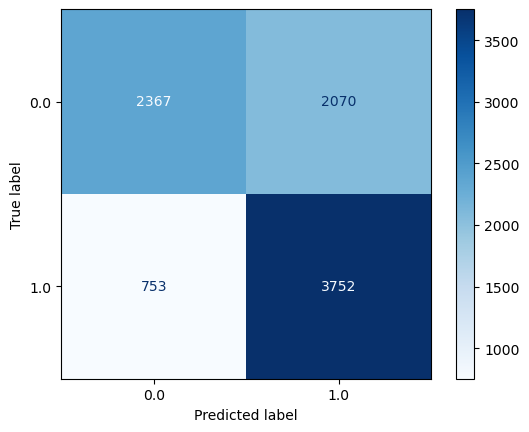

In [245]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final,
                          y_pred, 
                          labels= log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix= log_cm, 
                                  display_labels= log_clf.classes_)

# Plot confusion matrix
log_disp.plot(cmap= 'Blues')

# Display plot
plt.show()

**True Negatives (2058)**
* Total Videos by unverified accounts that we were able to accurately classify

**False Positive (2389)**
* Total Videos by unverified accounts that we were classified as posted by verified accounts

**False Negative (653)**
* Total Videos by verified accounts that we were classified as posted by unverified accounts

**True Positive  (3852)**
* Total Videos by verified accounts that we were able to accurately classify

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [246]:
# Create a classification report
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.76      0.53      0.63      4437
not verified       0.64      0.83      0.73      4505

    accuracy                           0.68      8942
   macro avg       0.70      0.68      0.68      8942
weighted avg       0.70      0.68      0.68      8942



The model with logistic regression achieved and Precision of 68%, a recall of 65% and, a F1 score of 64% weighted average.

### **Task 4c. Interpret model coefficients**

In [247]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})


,Feature Name,Model Coefficient
0,video_duration_sec,-0.001374
1,video_view_count,-0.000000
2,video_share_count,0.000004
3,video_comment_count,-0.243908
4,video_like_count,0.000259
5,claim_status_opinion,1.521192
6,author_ban_status_banned,-0.468301
7,author_ban_status_under review,-0.292621


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?
Due to the presence of strong correlations among certain variables in the dataset, potential multicollinearity issues may arise when applying a logistic regression model. The decision was made to exclude the variable "video_share_count" from the model construction.

Based on the logistic regression model, `video_like_count` has the most significant impact on the target variable compared to other features.

The logistic regression model had decent predictive power: a precision of 68% and a recall of 65% (weighted averages), and it achieved an accuracy of 65%.

2. What results can be presented from this project?

we developed a model for verified status based on video features using logistic regression and we found he features that contribute the most to our prediction.